In [1]:
import sympy as sp
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from math import sqrt
import time

**Код**

In [2]:
def plot_levels(Q_def, lx=-5, rx=5, ly=-5, ry=5, gridsize=50, levels=(50), path=None):
    plt.figure()
    a = np.linspace(lx, rx, gridsize)
    b = np.linspace(ly, ry, gridsize)
    _x, _y = np.meshgrid(a, b)
    c = plt.contour(_x, _y, Q_def([_x, _y]), levels)
    if path != None:
        c = plt.plot(path[0], path[1])
        c = plt.scatter(path[0], path[1], s=3, c='r')
    plt.grid()
    plt.show(c)

In [3]:
def Q_value(Q, _x, _y):
    return Q.evalf(subs={x:_x, y:_y})

def antigrad(Q_def, x, eps):
    # approx_fprime вычисляет градиент в точке с заданной точностью
    return -1 * optimize.approx_fprime(x, Q_def, eps**2)

In [4]:
def gradient_descent(Q_def, max_iter_count, start_x=0, start_y=0, eps=1e-4):
    t0 = time.time()
    path_x = [start_x]
    path_y = [start_y]
    
    current_point = np.array([start_x, start_y], dtype=np.float64)
        
    iter_counter = 0
    
    # dk - направление смещения
    dk = antigrad(Q_def, current_point, eps)

    while np.linalg.norm(dk) > eps and iter_counter < max_iter_count:
        iter_counter += 1
        dk = antigrad(Q_def, current_point, eps)
        # xk - величина смещения -
        # - точка минимума заданной функции в направлении антиградиента (функция как от одного аргумента)
        Q_of_the_xk = lambda _xk: Q_def(*[current_point+_xk*dk])
        xk = optimize.minimize_scalar(Q_of_the_xk).x
        current_point += xk*dk
        path_x.append(current_point[0])
        path_y.append(current_point[1])
    
    print(f'Time: {time.time()-t0} seconds')
    return current_point, (path_x, path_y), iter_counter

## Rosenbrock

In [5]:
x = sp.symbols('x')
y = sp.symbols('y')

In [6]:
Rosenbrock = (1-x)**2 + 100*(y-x**2)**2

In [7]:
Rosenbrock

(1 - x)**2 + 100*(-x**2 + y)**2

In [8]:
def rosenbrock_def(x):
  return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

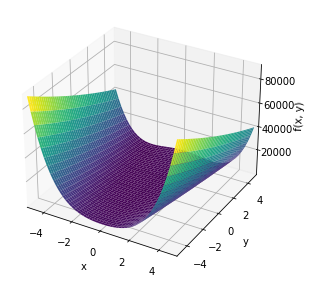

In [9]:
sp.plotting.plot3d(Rosenbrock, (x, -5, 5), (y, -5 , 5))

In [10]:
res_point, res_path, iter_count = gradient_descent(rosenbrock_def, 10000,  -4, -1)

Time: 1.549013376235962 seconds


In [11]:
res_point

array([0.99999366, 0.99998731])

In [12]:
Q_value(Rosenbrock, res_point[0], res_point[1])

4.01860190650263e-11

In [13]:
iter_count

4947

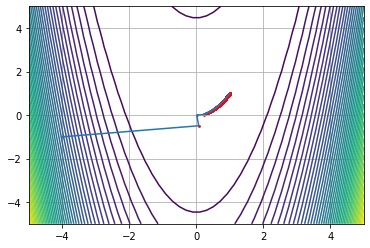

In [14]:
plot_levels(rosenbrock_def, path=res_path)

## Goldstein–Price

In [15]:
x = sp.symbols('x')
y = sp.symbols('y')

In [16]:
Goldstein = (1+((x+y+1)**2)*(19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))

In [17]:
Goldstein

((2*x - 3*y)**2*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18) + 30)*((x + y + 1)**2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19) + 1)

In [18]:
def goldstein_def(x):
  return (1+((x[0]+x[1]+1)**2)*(19-14*x[0]+3*x[0]**2-14*x[1]+6*x[0]*x[1]+3*x[1]**2))*(30+((2*x[0]-3*x[1])**2)*(18-32*x[0]+12*x[0]**2+48*x[1]-36*x[0]*x[1]+27*x[1]**2))

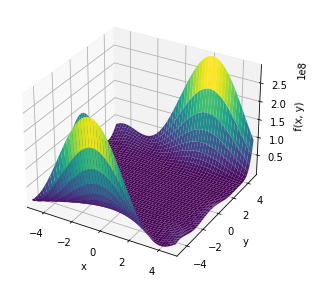

In [19]:
sp.plotting.plot3d(Goldstein, (x, -5, 5), (y, -5 , 5))

In [20]:
res_point, res_path, iter_count = gradient_descent(goldstein_def, 10000,  -4, -1)

Time: 0.011966466903686523 seconds


In [21]:
res_point

array([ 3.77719725e-08, -9.99999959e-01])

In [22]:
Q_value(Goldstein, res_point[0], res_point[1])

3.00000000000076

In [23]:
iter_count

19

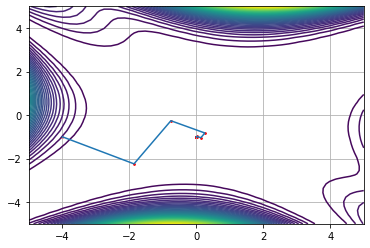

In [24]:
plot_levels(goldstein_def, path=res_path)

## Matyas

In [25]:
x = sp.symbols('x')
y = sp.symbols('y')

In [26]:
Matyas = 0.26*(x**2+y**2)-0.48*x*y

In [27]:
Matyas

0.26*x**2 - 0.48*x*y + 0.26*y**2

In [28]:
def matyas_def(x):
  return (0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1])

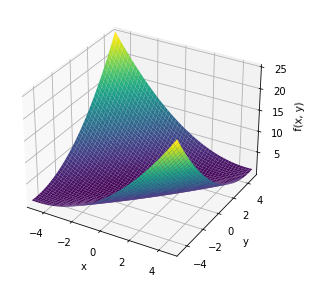

In [29]:
sp.plotting.plot3d(Matyas, (x, -5, 5), (y, -5 , 5))

In [30]:
res_point, res_path, iter_count = gradient_descent(matyas_def, 10000, -4, -1)

Time: 0.0029931068420410156 seconds


In [31]:
res_point

array([-2.65727409e-05, -6.64348086e-06])

In [32]:
Q_value(Matyas, res_point[0], res_point[1])

1.10327025304263e-10

In [33]:
iter_count

10

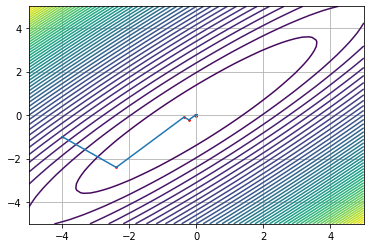

In [34]:
plot_levels(matyas_def, path=res_path)

## Himmelblau's

In [35]:
x = sp.symbols('x')
y = sp.symbols('y')

In [36]:
Himmel = (x**2+y-11)**2+(x+y**2-7)**2

In [37]:
Himmel

(x + y**2 - 7)**2 + (x**2 + y - 11)**2

In [38]:
def himmel_def(x):
  return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

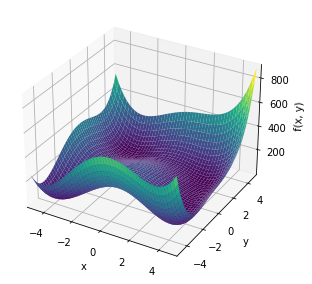

In [39]:
sp.plotting.plot3d(Himmel, (x, -5, 5), (y, -5 , 5))

In [40]:
res_point, res_path, iter_count = gradient_descent(himmel_def, 10000,  -4, -1)

Time: 0.0029921531677246094 seconds


In [41]:
res_point

array([-3.77931025, -3.28318599])

In [42]:
Q_value(Himmel, res_point[0], res_point[1])

2.94424252070595e-17

In [43]:
iter_count

7

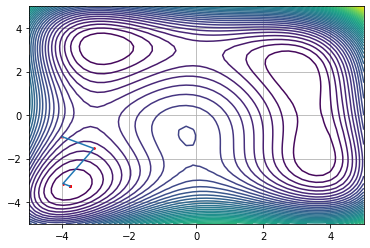

In [44]:
plot_levels(himmel_def, path=res_path)